In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [290]:
# load data
tobi_df = pd.read_csv('discography_boy pablo.csv')
my_df_short = pd.read_csv('user_daviskeene_short_term.csv')

In [242]:
# Compute the standard deviations of the features in, in order to get the most important ones.
# feature list: danceability, acousticness, energy, instrumentalness, liveliness, speechiness
stds = list(my_df_short_new.std())
my_df_short_new.std()
print(list(my_mean))
def decreasing(x):
    return np.e ** (-2*x)

print(list(my_df_short_new.std()))
weights = [decreasing(x) for x in stds]
print(weights)
my_mean = [my_mean[i] / weights[i] for i in range(len(my_mean))]

[0.6470199999999999, 0.23096660599999996, 0.6590599999999999, 0.058641881, 0.21181200000000003, 0.10404599999999999]
[0.16154300495217858, 0.2575106510011167, 0.170037740108555, 0.1734551722266666, 0.1385058764538346, 0.11065066044603104]
[0.7239115881237392, 0.597487866794801, 0.7117166002116356, 0.7068687001166183, 0.7580455878183507, 0.8014751426968982]


In [291]:
# clean up data
cols_to_drop = ['Unnamed: 0', 'time_signature', 'release_date', 'popularity', 'tempo', 'length', 'loudness', 'danceability.1']
cols_to_augment = []

from numpy.linalg import norm

def sigmoid(x):
    return 1/(1 + np.exp(-x))

tobi_df_new = tobi_df.drop(columns=cols_to_drop)
tobi_df_new[cols_to_augment] = tobi_df_new[cols_to_augment].apply(sigmoid)
tobi_df_new._get_numeric_data()

my_df_short_new = my_df_short.drop(columns=cols_to_drop)
my_df_short_new[cols_to_augment] = my_df_short_new[cols_to_augment].apply(sigmoid)
my_df_short_new._get_numeric_data()

# get an average of all the columns for my songs
my_mean = my_df_short_new.mean()

# Get the similarity by getting the cartesian distance between points
distances = [distance_vector(list(tobi_df_new._get_numeric_data().loc[i]), my_mean) for i in range(tobi_df_new.shape[0])]
distances = [sum_z(list(tobi_df_new._get_numeric_data().loc[i]), my_mean, stds) for i in range(tobi_df_new.shape[0])]
tobi_df_new['daviskeene_similarity'] = distances
# Now, weigh similarity by how the "important" features are.
# stds = list(my_df_short_new.std())
# weights = [1-x for x in stds]
# c = .005
# scores = tobi_df_new['daviskeene_similarity'] * c + 
# tobi_df_new['daviskeene_similarity'] = tobi_df_new['daviskeene_similarity'] +

In [189]:
tobi_df_new.mean()

danceability             0.741397
acousticness             0.329062
energy                   0.551317
instrumentalness         0.010821
liveness                 0.148167
speechiness              0.139043
daviskeene_similarity    0.329275
dtype: float64

In [134]:
list(tobi_df_new._get_numeric_data().loc[0])

[0.726, 0.457, 0.493, 0.0, 0.13699999999999998, 0.21100000000000002]

In [209]:
def distance_vector(x, y):
    """
    Returns the cartesian distance between two vectors of size n
    """
    import math
    n = len(x)
    s = 0
    for i in range(n):
        s += (x[i] - y[i]) * (x[i] - y[i])
    return math.sqrt((s))



In [266]:
# Try using sum of z-scores as a metric
def sum_z(x, y, stdevs):
    """
    :param x: list of means
    :param y: song features
    :param stdevs: my stdevs
    """
    s = 0
    for i in range(len(x)):
        s += abs(y[i] - x[i]) / stdevs[i]
    return s

In [116]:
my_mean

[0.8937831782427607,
 0.38656283890585225,
 0.9260146521860276,
 0.0829600758815963,
 0.27941855134279364,
 0.12981812467682244]

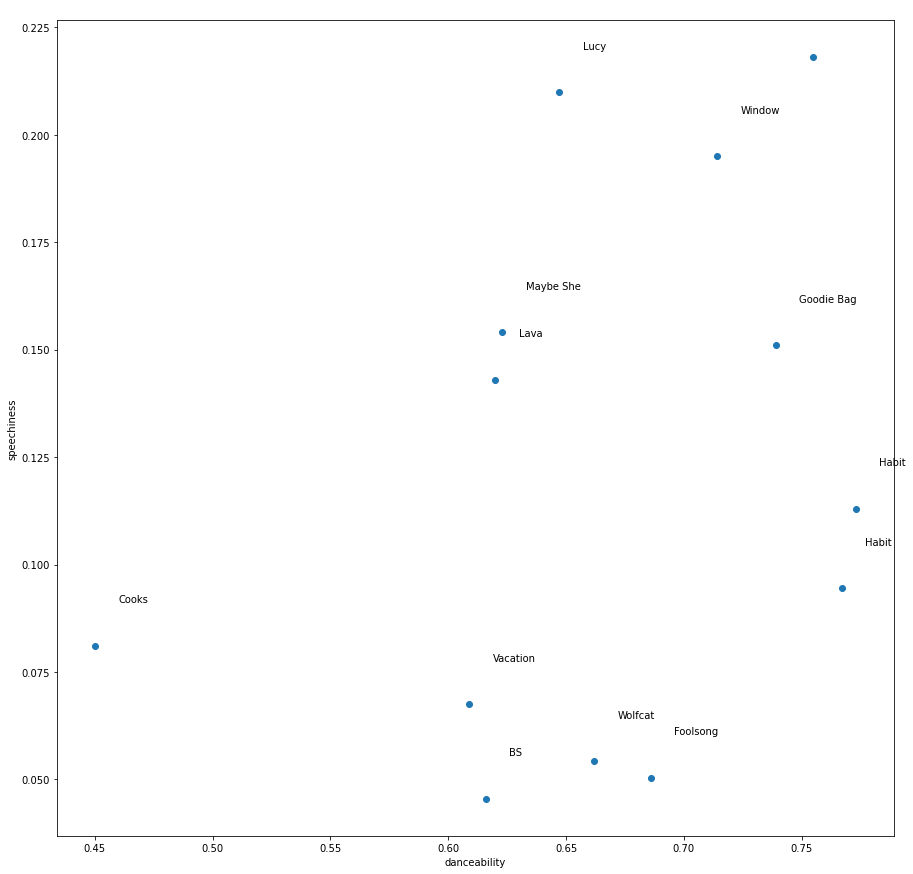

In [214]:
plt.figure(figsize=(15,15))
# Add the point labels
x = tobi_df_new['danceability']
y = tobi_df_new['speechiness']
plt.scatter(x, y)
pt_labels = tobi_df_new['name']
for i in range(len(pt_labels)):
    plt.annotate(pt_labels[i], (x[i]+.01,y[i]+.01))
plt.xlabel('danceability')
plt.ylabel('speechiness');

In [293]:
tobi_df_new.groupby('name').mean().sort_values(by='daviskeene_similarity', ascending=True)

,danceability,acousticness,energy,instrumentalness,liveness,speechiness,daviskeene_similarity
name,,,,,,,
honey,0.656,0.304000,0.6280,0.074000,0.1350,0.03390,1.798926
rest up,0.610,0.232000,0.7700,0.065000,0.1660,0.02660,1.952950
mustache,0.652,0.000743,0.6280,0.005700,0.1800,0.02530,2.354091
Ready / Problems,0.561,0.078800,0.7080,0.009240,0.2260,0.03670,2.407105
Yeah (Fantasizing),0.650,0.005490,0.6970,0.000113,0.1720,0.02930,2.417557
JD's song,0.558,0.003030,0.6900,0.022900,0.2330,0.03190,2.629224
Never Cared,0.607,0.187000,0.6290,0.000012,0.0422,0.03370,2.793604
"Dance, Baby!",0.602,0.037000,0.6010,0.004600,0.3120,0.04110,2.977159
Feeling Lonely,0.635,0.014000,0.5370,0.000037,0.1030,0.05360,3.214185
